Olá, Renan

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Project Description

Você trabalha em uma startup que vende produtos alimentícios. Você precisa analisar o comportamento do usuário para o aplicativo da empresa.
Primeiro estude o funil de vendas. Descubra como os usuários chegam à etapa de compra.Quantos usuários realmente chegam a essa etapa? Quantos ficam presos nas fases anteriores? Quais etapas em particular?

Em seguida, veja os resultados do teste A/A/B. (Continue lendo para obter mais informação sobre os testes A/A/B.) Os designers gostariam de alterar as fontes de todo o aplicativo,mas os gerentes temem que os usuários achem o novo design intimidador. Eles decidem tomar a decisão com base nos resultados de um teste A/A/B.

Os usuários são divididos em três grupos: dois grupos de controle recebem as fontes antigas e um grupo de teste recebe as novas. Descubra qual conjunto de fontes produz melhores resultados.

A criação de dois grupos A tem certas vantagens. Podemos adaptar um princípio segundo o qual só estaremos confiantes na precisão de nossos testes quando os dois grupos de controle forem semelhantes. Se houver diferenças significativas entre os grupos A, isso pode nos ajudar a descobrir fatores que podem distorcer os resultados. A comparação de grupos de controle também nos informa de quanto tempo e dados precisaremos ao executar outros testes.

Você usará o mesmo conjunto de dados para análise geral e análise A/A/B. Em projetos reais, os experimentos se realizam constantemente. Os analistas estudam a qualidade de um aplicativo usando dados gerais, sem prestar atenção na participação dos usuários de experimentos.

## Initializing

In [81]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import t
from scipy.stats import ttest_ind
from scipy.stats import levene
from statsmodels.stats.proportion import proportions_ztest


In [82]:
# loading files

try:
    log = pd.read_csv('/datasets/logs_exp_us.csv', delimiter="\\t")
    
except FileNotFoundError:
    log = pd.read_csv('logs_exp_us.csv', delimiter="\\t")
       

/tmp/ipykernel_87/821614877.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  log = pd.read_csv('/datasets/logs_exp_us.csv', delimiter="\\t")
/tmp/ipykernel_87/821614877.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  log = pd.read_csv('logs_exp_us.csv', delimiter="\\t")


In [83]:
log.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [84]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


     no missing values found

## Modifying and Standaryzing Data

In [87]:
#renaming columns
log.rename(columns={'EventName':'event','DeviceIDHash':'device_id', 'EventTimestamp':'timestamp', 'ExpId':'exp_id'}, inplace=True)

In [88]:
log.head()

,event,device_id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [89]:
#extracting date time from timestamp
log['datetime'] = pd.to_datetime(log['timestamp'], unit='s')

In [90]:
#creating column date
log['date'] = log['datetime'].dt.date

In [91]:
#modyfing date to datetime type
log['date'] = pd.to_datetime(log['date'])

In [92]:
#creating column time
log['time'] = log['datetime'].dt.time

In [93]:
log['month'] = log['datetime'].dt.month

In [94]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      244126 non-null  object        
 1   device_id  244126 non-null  int64         
 2   timestamp  244126 non-null  int64         
 3   exp_id     244126 non-null  int64         
 4   datetime   244126 non-null  datetime64[ns]
 5   date       244126 non-null  datetime64[ns]
 6   time       244126 non-null  object        
 7   month      244126 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 14.9+ MB


In [95]:
#checking duplicated dates
log['date'].duplicated().sum()

244112

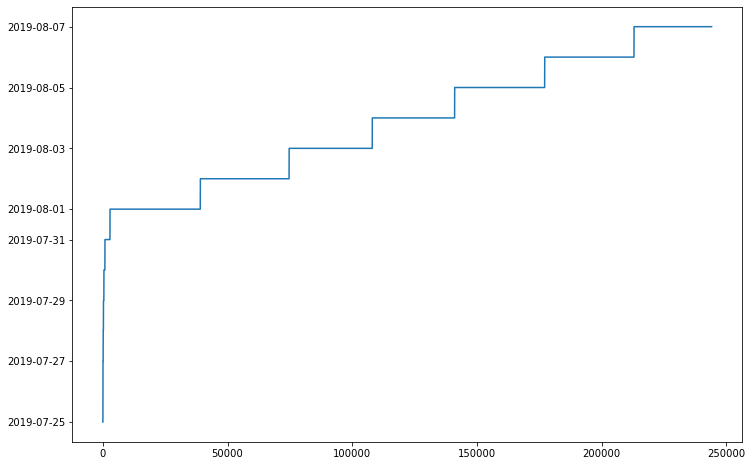

In [96]:
#ploting dates
log['date'].plot(figsize=(12,8))
plt.show()

    we can see duplicated values for dates could be multiple sessions logged daily, we notice a more patterned graphic after 1st of August

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O que você vai fazer com os valores dupicados?
</div>


# Data Analysis

## Quantos eventos ficam nos diários?


In [101]:
#counting events
log['event'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event, dtype: int64

In [102]:
#adding events
total_events = log['event'].value_counts().sum()
total_events

244126

    There are 244126 daily events

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>


## Quantos usuários ficam nos diários?

In [106]:
#counting users 
users = log['device_id'].duplicated().value_counts().reset_index()
users

,index,device_id
0,True,236575
1,False,7551


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas você pode usar nunique(). Veja código abaixo
</div>


In [108]:
 log['device_id'].nunique()

7551

    there are 7551 users

## Qual é o número médio de eventos por usuário?

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você pode contar os eventos e dividir pelo número de usuários: 
    
-`len(log)/ log['device_id'].nunique()`
-`log['event'].value_counts() / log['device_id'].nunique()`    
</div>


In [190]:
#average user per event calculation
avg_user_event = (len(log) / log['device_id'].nunique() - log['event'].value_counts() / log['device_id'].nunique()).round(2).reset_index(name='avg')
avg_user_event

,index,avg
0,MainScreenAppear,16.54
1,OffersScreenAppear,26.13
2,CartScreenAppear,26.67
3,PaymentScreenSuccessful,27.79
4,Tutorial,32.19


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Erro no código
</div>


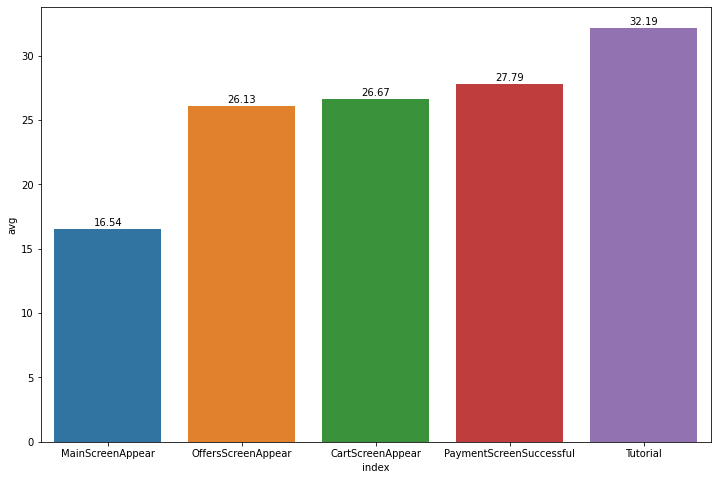

In [193]:
plt.figure(figsize=(12,8))
sns.barplot(data=avg_user_event, x='index', y='avg')
for index, value in enumerate(avg_user_event['avg']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

## Qual é o período de tempo que os dados cobrem? Encontre a data máxima e mínima

In [195]:
#max date
log['date'].max()

Timestamp('2019-08-07 00:00:00')

In [197]:
#min date
log['date'].min()

Timestamp('2019-07-25 00:00:00')

In [299]:
log['date'].max() - log['date'].min()

Timedelta('13 days 00:00:00')

    period of 13 days

## Desenhe um histograma por data e hora.

In [201]:
log.head()

,event,device_id,timestamp,exp_id,datetime,date,time,month
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,04:43:36,7
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,11:11:42,7
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47,7
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47,7
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,11:48:42,7


In [304]:
#datetime event plot
#fig, ax = plt.subplots(figsize=(12,8))
#sns.histplot(data=log, x='datetime', y='event', hue='event', ax=ax)
#plt.xticks(rotation=45)
#plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Oriento usar seaborn ou algo simples. Veja código abaixo
</div>


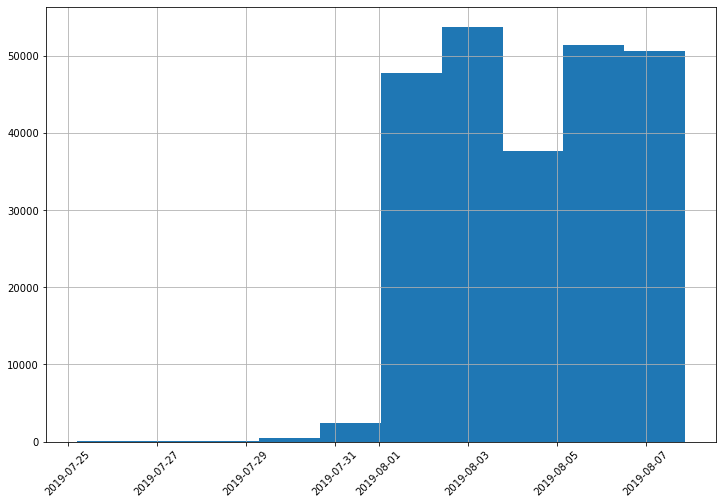

In [206]:
#datetime histogram
log['datetime'].hist(figsize=(12,8))
plt.xticks(rotation=45)
plt.show()

    Some data missing from before 1st of August

## Você perdeu muitos eventos e usuários ao excluir os dados mais antigos? Certifique-se de ter usuários de todos os três grupos experimentais.

In [210]:
exp_group_log = log.groupby('exp_id')['device_id'].nunique().reset_index()
exp_group_log

,exp_id,device_id
0,246,2489
1,247,2520
2,248,2542


In [212]:
#filtering data to August
aug_log = log.query('date > "2019-08-01"')

In [214]:
aug_log.head()

,event,device_id,timestamp,exp_id,datetime,date,time,month
39057,CartScreenAppear,6304868067479728361,1564704000,248,2019-08-02 00:00:00,2019-08-02,00:00:00,8
39058,MainScreenAppear,6077372516405234625,1564704008,246,2019-08-02 00:00:08,2019-08-02,00:00:08,8
39059,PaymentScreenSuccessful,6304868067479728361,1564704018,248,2019-08-02 00:00:18,2019-08-02,00:00:18,8
39060,CartScreenAppear,6304868067479728361,1564704019,248,2019-08-02 00:00:19,2019-08-02,00:00:19,8
39061,PaymentScreenSuccessful,6304868067479728361,1564704032,248,2019-08-02 00:00:32,2019-08-02,00:00:32,8


In [216]:
#experience group distribuiton
exp_group = aug_log.groupby('exp_id')['device_id'].nunique().reset_index()
exp_group

,exp_id,device_id
0,246,2393
1,247,2434
2,248,2459


In [218]:
exp_group['lost_users'] = exp_group_log['device_id'] - exp_group['device_id']
exp_group

,exp_id,device_id,lost_users
0,246,2393,96
1,247,2434,86
2,248,2459,83


In [220]:
#experience group distribuiton plot
#fig, ax = plt.subplots(figsize=(12,8))
#sns.barplot(data=exp_group, x='exp_id',y='device_id')
#plt.title('Experience Groups Size')
#plt.show()

In [222]:
exp_group['lost_users'].sum()

265

    only 265 users were lost from filtering data

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Precisamos responder a pergunta: perdeu muitos usuários e eventos?
</div>


## Veja quais eventos estão nos diários e sua frequência de ocorrência. Classifique-os por frequência.

In [227]:
aug_log['event'].value_counts()

MainScreenAppear           99474
OffersScreenAppear         39359
CartScreenAppear           36134
PaymentScreenSuccessful    29311
Tutorial                     791
Name: event, dtype: int64

In [229]:
aug_log

,event,device_id,timestamp,exp_id,datetime,date,time,month
39057,CartScreenAppear,6304868067479728361,1564704000,248,2019-08-02 00:00:00,2019-08-02,00:00:00,8
39058,MainScreenAppear,6077372516405234625,1564704008,246,2019-08-02 00:00:08,2019-08-02,00:00:08,8
39059,PaymentScreenSuccessful,6304868067479728361,1564704018,248,2019-08-02 00:00:18,2019-08-02,00:00:18,8
39060,CartScreenAppear,6304868067479728361,1564704019,248,2019-08-02 00:00:19,2019-08-02,00:00:19,8
39061,PaymentScreenSuccessful,6304868067479728361,1564704032,248,2019-08-02 00:00:32,2019-08-02,00:00:32,8
...,...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07,21:12:25,8
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07,21:13:59,8
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07,21:14:43,8
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07,21:14:58,8


In [231]:
event_id = aug_log.groupby('event')['device_id'].count().reset_index().sort_values(by='event')
event_id

,event,device_id
0,CartScreenAppear,36134
1,MainScreenAppear,99474
2,OffersScreenAppear,39359
3,PaymentScreenSuccessful,29311
4,Tutorial,791


In [233]:
event_id['ratio'] = (event_id['device_id']/event_id['device_id'].sum())*100
event_id

,event,device_id,ratio
0,CartScreenAppear,36134,17.620411
1,MainScreenAppear,99474,48.507575
2,OffersScreenAppear,39359,19.193052
3,PaymentScreenSuccessful,29311,14.293238
4,Tutorial,791,0.385724


In [235]:
event_id['device_id'].sum()

205069

In [237]:
#calculating success rate
sucess_rate = event_id['ratio'].loc[3] - event_id['ratio'].loc[1]
sucess_rate

-34.214337613193614

In [239]:
#ratio main screen to offers
main_offer = event_id['ratio'].loc[2] - event_id['ratio'].loc[1]
main_offer

-29.314523404317576

In [241]:
#ratio offers to cart
offer_cart = event_id['ratio'].loc[0] - event_id['ratio'].loc[2]
offer_cart

-1.57264140362512

In [243]:
#ratio cart to payment
cart_payment = event_id['ratio'].loc[3] - event_id['ratio'].loc[0]
cart_payment

-3.3271728052509157

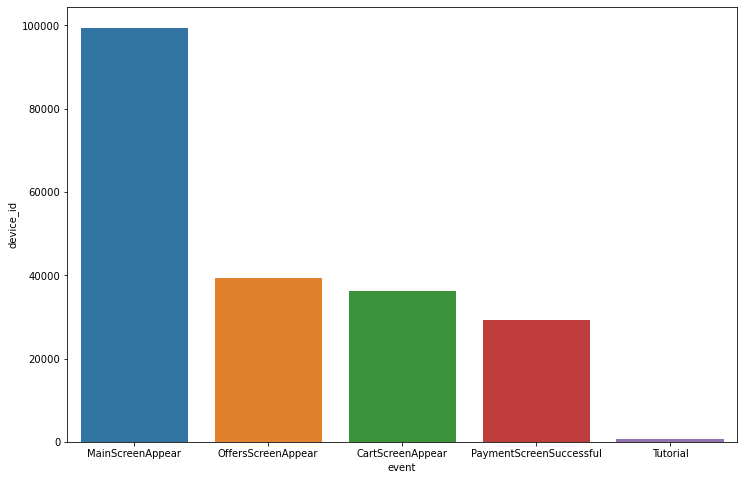

In [245]:
#event barplot
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=event_id.sort_values(by='device_id',ascending=False), x='event', y='device_id')
plt.show()

* 48% of users stop at MainScreenAppear
* make the tutorial more efficient could increase user experience therefore increase revenue
* success rate calculated at 29.4%
* test a new main screen design 
* we lose 29% of users from main screen to offers
* 1.5% don't get to cart from offers
* 3.3% users are lost from cart to payment
* 44% of potential demand are lost


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
Tudo tranquilo aqui. Oriento plotar gráfico
</div>


## Encontre o número de usuários que executaram cada uma dessas ações. Ordene os eventos pelo número de usuários. Calcule a proporção de usuários que executaram a ação pelo menos uma vez.

In [250]:
event_id

,event,device_id,ratio
0,CartScreenAppear,36134,17.620411
1,MainScreenAppear,99474,48.507575
2,OffersScreenAppear,39359,19.193052
3,PaymentScreenSuccessful,29311,14.293238
4,Tutorial,791,0.385724


## Em que ordem você acha que as ações ocorreram. Todos eles fazem parte de uma única sequência? Você não precisa levá-los em consideração ao calcular o funil.

In [253]:
event_id

,event,device_id,ratio
0,CartScreenAppear,36134,17.620411
1,MainScreenAppear,99474,48.507575
2,OffersScreenAppear,39359,19.193052
3,PaymentScreenSuccessful,29311,14.293238
4,Tutorial,791,0.385724


    the higher main screen ratio and very low tutorial only 0.3% could indicate customer is missing a step

## Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima. (Por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B.)## Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima. (Por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B.)

## Em qual fase você perde mais usuários?

In [258]:
event_id

,event,device_id,ratio
0,CartScreenAppear,36134,17.620411
1,MainScreenAppear,99474,48.507575
2,OffersScreenAppear,39359,19.193052
3,PaymentScreenSuccessful,29311,14.293238
4,Tutorial,791,0.385724


    We have significant lost of users from main screen to offers.

## Qual é a parcela de usuários que faz o caminho inteiro, desde o primeiro evento até o pagamento?

In [262]:
event_id

,event,device_id,ratio
0,CartScreenAppear,36134,17.620411
1,MainScreenAppear,99474,48.507575
2,OffersScreenAppear,39359,19.193052
3,PaymentScreenSuccessful,29311,14.293238
4,Tutorial,791,0.385724


    only 14% users get to payment screen

## Quantos usuários há em cada grupo?

In [292]:
exp_group

,exp_id,device_id,lost_users
0,246,2393,96
1,247,2434,86
2,248,2459,83


* group <b>246</b> has <b>2393</b> users
* group <b>274</b> has <b>2434</b> users
* group <b>248</b> has <b>2459</b> users

## Temos dois grupos de controle no teste A/A, no qual verificamos nossos mecanismos e cálculos. Veja se há uma diferença estatisticamente significativa entre as amostragens 246 e 247.

* <b>H0: There is NO significant difference between group 246 and 247</b>

* <b>H1: There is a significant difference between group 246 and 247</b>

In [274]:
#setting significance
alpha = 0.05

In [276]:
#filtering group 246
groupA1 = aug_log.query('exp_id == 246')
groupA1.head()

,event,device_id,timestamp,exp_id,datetime,date,time,month
39058,MainScreenAppear,6077372516405234625,1564704008,246,2019-08-02 00:00:08,2019-08-02,00:00:08,8
39080,MainScreenAppear,6480400942582945061,1564704174,246,2019-08-02 00:02:54,2019-08-02,00:02:54,8
39082,MainScreenAppear,6480400942582945061,1564704188,246,2019-08-02 00:03:08,2019-08-02,00:03:08,8
39101,MainScreenAppear,3689985694197060241,1564704295,246,2019-08-02 00:04:55,2019-08-02,00:04:55,8
39104,MainScreenAppear,2065146184371811225,1564704310,246,2019-08-02 00:05:10,2019-08-02,00:05:10,8


In [278]:
#grouping A1 by events
groupA1_event = groupA1.groupby('event')['device_id'].nunique().reset_index(name='count').sort_values('count',ascending=False)
groupA1_event

,event,count
1,MainScreenAppear,2355
2,OffersScreenAppear,1480
0,CartScreenAppear,1213
3,PaymentScreenSuccessful,1152
4,Tutorial,230


In [280]:
#filtering group 247
groupA2 = aug_log.query('exp_id == 247')
groupA2.head()

,event,device_id,timestamp,exp_id,datetime,date,time,month
39093,MainScreenAppear,7645173991196088727,1564704250,247,2019-08-02 00:04:10,2019-08-02,00:04:10,8
39096,MainScreenAppear,7645173991196088727,1564704268,247,2019-08-02 00:04:28,2019-08-02,00:04:28,8
39133,MainScreenAppear,7645173991196088727,1564704459,247,2019-08-02 00:07:39,2019-08-02,00:07:39,8
39140,OffersScreenAppear,1872978591788881482,1564704538,247,2019-08-02 00:08:58,2019-08-02,00:08:58,8
39164,CartScreenAppear,1872978591788881482,1564704723,247,2019-08-02 00:12:03,2019-08-02,00:12:03,8


In [282]:
#grouping A2 by events
groupA2_event = groupA2.groupby('event')['device_id'].nunique().reset_index(name='count').sort_values('count',ascending=False)
groupA2_event

,event,count
1,MainScreenAppear,2392
2,OffersScreenAppear,1438
0,CartScreenAppear,1184
3,PaymentScreenSuccessful,1118
4,Tutorial,227


In [486]:
#chi2 test
a1_a2 = aug_log[aug_log['exp_id'].isin([246,247])].drop_duplicates(subset = 'device_id')
contingency_table = pd.crosstab(a1_a2['event'], a1_a2['exp_id'])
p = chi2_contingency(contingency_table)
p_value = p[1]

if p_value < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

 We can't reject null hypotesis


<b>There is NO significant difference between group 246 and 247</b>

## Selecione o evento mais popular. Em cada um dos grupos de controle, encontre o número de usuários que realizaram essa ação. Encontre a proporção deles. Verifique se a diferença entre os grupos é estatisticamente significativa. Repita o procedimento para todos os outros eventos (economizará tempo se você criar uma função especial para este teste). Você pode confirmar se os grupos foram divididos corretamente?

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Quais são as hipóteses nula e alternativa?
- Recomendo usar o teste proportions_ztest    
</div>


* <b>H0: There is NO significant difference between group 246 and 247 for all events</b>

* <b>H1: There is a significant difference between group 246 and 247 for all events</b>

In [439]:
#pivot_table group 246 and 247
a1_a2_event = pd.pivot_table(data=a1_a2, index='event',columns='exp_id',values='device_id',aggfunc='nunique').reset_index()
a1_a2_event

exp_id,event,246,247
0,CartScreenAppear,18,20
1,MainScreenAppear,2035,2059
2,OffersScreenAppear,91,113
3,PaymentScreenSuccessful,35,30
4,Tutorial,214,212


In [488]:
#running chi2 test for each event group 246 and 247
group = [246,247]
 
#perform chi-square test for the current event
chi2_stat, p_val, dof, expected = chi2_contingency(a1_a2_event[group])

if p_value < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

 We can't reject null hypotesis


* <b> There is NO significant difference between group 246 and 247 for all events</b>

<div class="alert alert-block alert-info">
<b>Estou com dificuldade de interar o teste, mandei mensagem para o meu tutor Anilton tambe, mas se puder checar o progresso ate agora. Obrigado.</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>
Deixei alguams dicas.
Oriento discutir com o tutor. Esse projeto é realmente mais complicado.


Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>

## Faça a mesma coisa para o grupo com fontes alteradas. Compare os resultados com os de cada um dos grupos de controle para cada evento isoladamente. Compare os resultados com os resultados combinados para os grupos de controle. Quais conclusões você pode tirar do experimento?

* <b>H0: There is NO significant difference between group 246 and 248 for all events</b>

* <b>H1: There is a significant difference between group 246 and 248 for all events</b>

In [482]:
#selection group 246 and 248 
a_b = aug_log[aug_log['exp_id'].isin([246,248])].drop_duplicates(subset = 'device_id')
a_b

,event,device_id,timestamp,exp_id,datetime,date,time,month
39057,CartScreenAppear,6304868067479728361,1564704000,248,2019-08-02 00:00:00,2019-08-02,00:00:00,8
39058,MainScreenAppear,6077372516405234625,1564704008,246,2019-08-02 00:00:08,2019-08-02,00:00:08,8
39073,MainScreenAppear,6991683592829765144,1564704106,248,2019-08-02 00:01:46,2019-08-02,00:01:46,8
39080,MainScreenAppear,6480400942582945061,1564704174,246,2019-08-02 00:02:54,2019-08-02,00:02:54,8
39101,MainScreenAppear,3689985694197060241,1564704295,246,2019-08-02 00:04:55,2019-08-02,00:04:55,8
...,...,...,...,...,...,...,...,...
243157,MainScreenAppear,6316979872032596527,1565208219,246,2019-08-07 20:03:39,2019-08-07,20:03:39,8
243339,MainScreenAppear,5811573131275421338,1565208834,248,2019-08-07 20:13:54,2019-08-07,20:13:54,8
243542,Tutorial,5365227480683749189,1565209432,248,2019-08-07 20:23:52,2019-08-07,20:23:52,8
243777,MainScreenAppear,6660805781687343085,1565210322,246,2019-08-07 20:38:42,2019-08-07,20:38:42,8


In [501]:
#event pivot_table group a and b
ab_event = pd.pivot_table(data=a_b, index='event',columns='exp_id',values='device_id',aggfunc='nunique').reset_index()
ab_event

exp_id,event,246,248
0,CartScreenAppear,18,27
1,MainScreenAppear,2035,2083
2,OffersScreenAppear,91,90
3,PaymentScreenSuccessful,35,40
4,Tutorial,214,219


In [503]:
#running chi2 test for each event group 246 and 248
group = [246,248]
 
#perform chi-square test for the current event
chi2_stat, p_val, dof, expected = chi2_contingency(ab_event[group])

if p_value < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

 We can't reject null hypotesis


* <b>There is a significant difference between group 246 and 248 for all events</b>

## Qual nível de significância você definiu para testar as hipóteses estatísticas mencionadas acima? Calcule quantos testes de hipóteses estatísticas você realizou. Com um nível de significância estatística de 0,1, um de cada 10 resultados pode ser falso. Qual deveria ser o nível de significância?Se você quiser alterá-lo, execute as etapas anteriores novamente e verifique suas conclusões.

* signifance was set at 5%
    
* 3 chi2 tests were done. 2 for comparison control groups (246,247) and 1 between control and treatment group(246,248)
    
    

In [517]:
#setting significance at 10%
alpha10 = 0.1

## Test A/A significance 10%

In [523]:
# test A/A using 10% significance

#running chi2 test for each event group 246 and 247
group = [246,247]
 
#perform chi-square test for the current event
chi2_stat, p_val, dof, expected = chi2_contingency(a1_a2_event[group])

if p_value < alpha10:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

 We can't reject null hypotesis


## Test A/B significance 10%

* <b>H0: There is NO significant difference between group 246 and 248 for all events</b>

* <b>H1: There is a significant difference between group 246 and 248 for all events</b>

In [525]:
#test A/B using significance 10%

#running chi2 test for each event group 246 and 248
group = [246,248]
 
#perform chi-square test for the current event
chi2_stat, p_val, dof, expected = chi2_contingency(ab_event[group])

if p_value < alpha10:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

 We can't reject null hypotesis
